# Understanding Descriptive Statistics

Import the necessary libraries here:

In [89]:
# Libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [90]:
# your code here
import pandas as pd
import random

def roll_dice():
    rolls = []
    for i in range(10):
        roll = random.choice([1, 2, 3, 4, 5, 6])
        rolls.append(roll)
    
    df = pd.DataFrame({'Roll': rolls})
    return df

df = roll_dice()

In [91]:
df

,Roll
0,2
1,4
2,4
3,6
4,4
5,6
6,2
7,5
8,1
9,2


#### 2.- Plot the results sorted by value.

<AxesSubplot: >

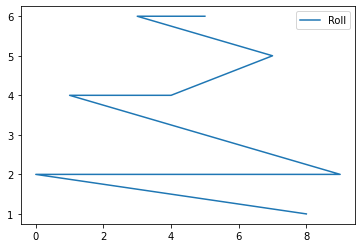

In [92]:
# your code here
df = df.sort_values(by='Roll')
df.plot(kind='line')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

<AxesSubplot: >

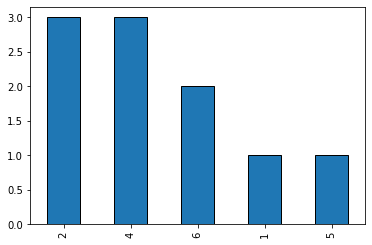

In [206]:
# your code here
frequency = df['Roll'].value_counts()
frequency.plot(kind='bar', edgecolor='black')

In [124]:
"""

The frequency distribution plot shows how many times each value was rolled, while the sorted results plot shows 
the order in which the values were rolled.

"""

'\n\nThe frequency distribution plot shows how many times each value was rolled, while the sorted results plot shows \nthe order in which the values were rolled.\n\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [177]:
# your code here
def mean(value):
    return sum(value)/len(value)

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [194]:
# your code here
def freq(values):
    frequency = {}
    for value in values:
        if value in frequency:
            frequency[value] += 1
        else: 
            frequency[value] = 1

    total = sum(frequency.values())
    mean = sum(value * count / total for value, count in frequency.items())
    return frequency, mean

frequency, mean_from_frequency = freq(rolling(6,10))

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [129]:
# your code here
def median(values):
    values.sort()
    n = len(values)
    if n % 2 == 0:
        median = (values[n//2 - 1] + values[n//2]) / 2
    else:
        median = values[n//2]
    return median

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [130]:
# your code here
def quartiles(values):
    values.sort()
    n = len(values)
    q1 = median(values[:n//2])
    q2 = median(values)
    if n % 2 == 0:
        q3 = median(values[n//2:])
    else:
        q3 = median(values[n//2 + 1:])
    return q1, q2, q3

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [136]:
# your code here
roll_the_dice = pd.read_csv("../data/roll_the_dice_hundred.csv")
roll_the_dice.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


In [139]:
roll_the_dice.drop(["Unnamed: 0"], axis=1, inplace=True)

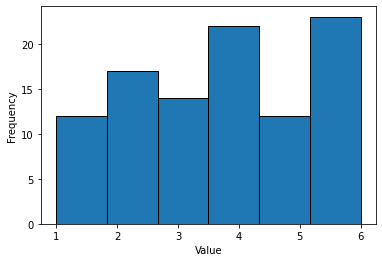

In [205]:
values = roll_the_dice["value"]
plt.hist(values, bins = 6, edgecolor='black')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [167]:
"""
6 and 4 appear more often than other values, meaning there could be bias in the dice roll.
"""

'\n6 and 4 appear more often than other values, meaning there could be bias in the dice roll.\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [178]:
# your code here
mean(values)

3.74

#### 3.- Now, calculate the frequency distribution.

In [195]:
# your code here
freq(values)

({1: 12, 2: 17, 6: 23, 5: 12, 4: 22, 3: 14}, 3.7399999999999998)

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

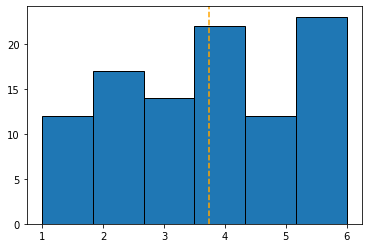

In [208]:
# your code here
plt.hist(values, bins=6, edgecolor='black')
plt.axvline(mean(values), color='orange', linestyle='--')
plt.show()

In [210]:
"""
4 and 6 show up more and that will make the mean value higher and more close to these numbers.
In this case, the mean of 3.74 is a good representation  of the tendency of the distribution, which is skewed towards
4 and 6. The histogram visually shows this by having taller bars for 4 and 6 compared to other values.
"""

'\n4 and 6 show up more and that will make the mean value higher and more close to these numbers.\nIn this case, the mean of 3.74 is a good representation  of the tendency of the distribution, which is skewed towards\n4 and 6. The histogram visually shows this by having taller bars for 4 and 6 compared to other values.\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

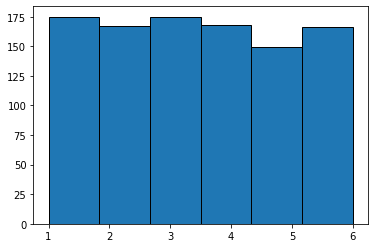

In [216]:
# your code here
roll_1000 = pd.read_csv("../data/roll_the_dice_thousand.csv")
plt.hist(roll_1000["value"], bins=6, edgecolor='black')
plt.show()

In [217]:
"""
By increasing the number of rolls, you get a distribution that's more balanced. 
"""

"\nBy increasing the number of rolls, you get a distribution that's more balanced. \n"

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

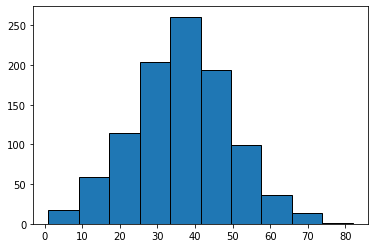

In [224]:
# your code here
bcn_age = pd.read_csv("../data/ages_population.csv")
plt.hist(bcn_age["observation"],edgecolor='black')
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [227]:
# your code here
print(bcn_age.observation.mean())
print(bcn_age.observation.std())

36.56
12.816499625976762


In [230]:
"""
They fall inside the ranges I expected (30-50). The standard deviation of 12.816499625976762 indicates that the ages 
of the habitants of Barcelona are dispersed around the mean - 36.56 -, with a range of roughly 12 years.
We can see this in the histogram.
"""

'\nThey fall inside the ranges I expected (30-50). The standard deviation of 12.816499625976762 indicates that the ages \nof the habitants of Barcelona are dispersed around the mean - 36.56 -, with a range of roughly 12 years.\nWe can see this in the histogram.\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

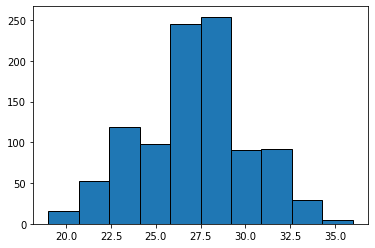

In [234]:
# your code here
ages_2 = pd.read_csv('../data/ages_population2.csv')
plt.hist(ages_2["observation"], edgecolor='black')
plt.show()

In [236]:
ages_2.value_counts()

observation
28.0           139
27.0           125
26.0           120
29.0           115
25.0            98
30.0            90
24.0            78
31.0            61
23.0            41
22.0            35
32.0            31
33.0            22
21.0            17
20.0            13
34.0             7
35.0             3
19.0             3
36.0             2
dtype: int64

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [238]:
"""
In this data, the population is younger. We only have a range between 28 and 36 years old so of course there's going to be
a difference with the frequency distribution.
"""

"\nIn this data, the population is younger. We only have a range between 28 and 36 years old so of course there's going to be\na difference with the frequency distribution.\n"

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [241]:
# your code here
print(ages_2["observation"].mean())
print(ages_2["observation"].std())

27.155
2.969813932689186


In [243]:
"""
These values make sense as they reflect that the majority of the ages in the data are around the mean, as we can see in 
the histogram and the value counts method. 
"""

'\nThese values make sense as they reflect that the majority of the ages in the data are around the mean, as we can see in \nthe histogram and the value counts method. \n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [245]:
# your code here
ages_3 = pd.read_csv("../data/ages_population3.csv")
ages_3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


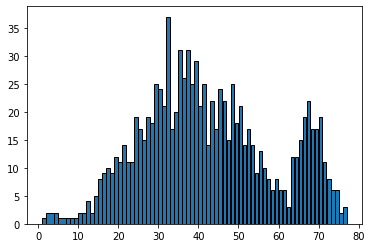

In [252]:
freq_3 = ages_3['observation'].value_counts().sort_index()
plt.hist(ages_3['observation'], bins=freq_3.index, edgecolor='black',  rwidth= 0.95)
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [253]:
# your code here
print(ages_3["observation"].mean())
print(ages_3["observation"].std())

41.989
16.144705959865934


In [116]:
"""
With the mean of 41.989 and standard deviation of 16.144705959865934, it's possible to confirm that not only is the population 
older but also that the data is more spread. There's a range of roughly 16 years, this is a larger range compared to the 
previous data set (12 years.)
We can also see this reflected in the histogram.
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [259]:
# your code here
ages = [ages_3["observation"]]
quartiles = np.percentile(ages, [25, 50, 75])
Q1, median, Q3 = quartiles

In [262]:
print(Q1)
print(median)
print(Q3)

30.0
40.0
53.0


In [265]:
mean= ages_3["observation"].mean()
difference = mean - median
print(difference)

1.9889999999999972


In [266]:
"""
The mean and median are close, meaning that the data is symmetrically distributed.
"""

'\nThe mean and median are close, meaning that the data is symmetrically distributed.\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [267]:
# your code here
percentiles = [90, 95, 99]
result = np.percentile(ages_3, percentiles)
print(result)

[67. 70. 74.]


In [268]:
"""
This means that 90% of the data falls below 67, 95% of the data falls below 70, and 99% of the data falls below 74. 
"""

'\nThis means that 90% of the data falls below 67, 95% of the data falls below 70, and 99% of the data falls below 74. \n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [283]:
# your code here
print("Neighbourdhood 1 mean: " + str(bcn_age["observation"].mean()), "| Neighbourdhood 1  std: " + str(bcn_age["observation"].std()))
print("Neighbourdhood 2 mean: " + str(ages_2["observation"].mean()), "| Neighbourdhood 2 std: " + str(ages_2["observation"].std()))
print("Neighbourdhood 3 mean: " + str(ages_3["observation"].mean()), "| Neighbourdhood 3 std: " + str(ages_3["observation"].std()))

Neighbourdhood 1 mean: 36.56 | Neighbourdhood 1  std: 12.816499625976762
Neighbourdhood 2 mean: 27.155 | Neighbourdhood 2 std: 2.969813932689186
Neighbourdhood 3 mean: 41.989 | Neighbourdhood 3 std: 16.144705959865934


In [285]:
# To compare the three neighbourhoods, I will evaluate their means and standard deviations.

###### Neighbourdhood 1 mean: 36.56 | Neighbourdhood 1  std: 12.816499625976762 ######
# This indicates that the ages of the population are dispersed around the mean, with a range of roughly 12 years. 
# This shows that there is a relatively large range of ages in this neighbourhood, with some inhabitants being older 
# or younger than the mean age.

###### Neighbourdhood 2 mean: 27.155 | Neighbourdhood 2 std: 2.969813932689186 ######
# This indicates that the ages of the population are much more tightly grouped around the mean. There is a much smaller 
# range of ages in this neighbourhood, with most of the inhabitants being close to the mean age.

###### Neighbourdhood 3 mean: 41.989 | Neighbourdhood 3 std: 16.144705959865934 ######
# This indicates that the ages of the population are dispersed around the mean, with a range of roughly 16 years. This shows 
# that there is a relatively large range of ages in this neighbourhood, with some inhabitants being older or younger than 
# the mean age.

# The first and third neighbourhoods are more similar in terms of the spread of ages of their population, while the second 
# neighbourhood is distinct in that the ages of its population are much more tightly grouped.